In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import base64

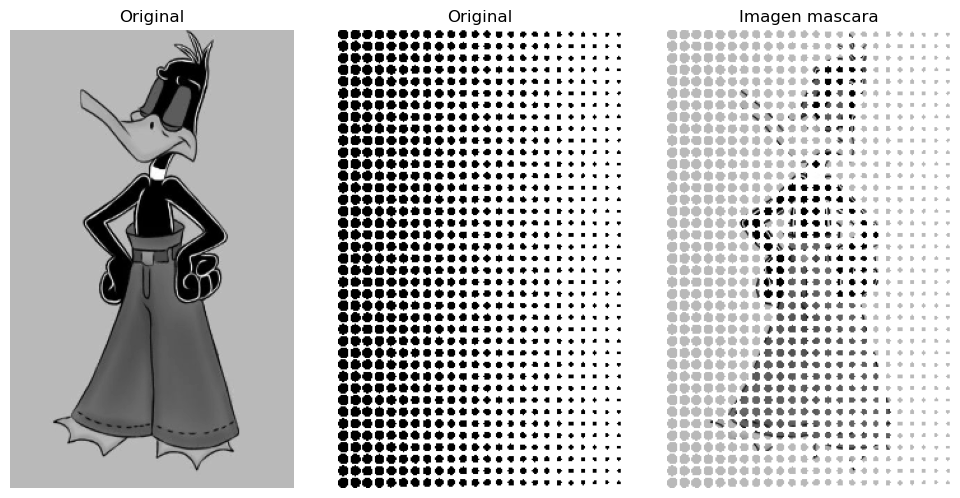

In [3]:
img1 = cv2.imread('..//img/pato.jpg', 0)
img2 = cv2.imread('..//img/puntos.png', 0)

# leer imagenes
# en escala de grises
# tengo escalar la imagen con resize
# despues debo binarizar las imagenes

img1 = cv2.resize(img1, (223, 360))
img2 = cv2.resize(img2, (223, 360))

_, im_bw = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)

_, im_bw2 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)

alto, ancho = img1.shape[:2]

# mascara = np.zeros_like(img1)

# circulo = (ancho // 2, alto // 3)
# circulo = (ancho // 2, alto // 2)
# radio = 180
# radio = 100

# cv2.circle(mascara, circulo, radio, (255), -1)

img_fin = cv2.bitwise_or(img1, im_bw)


plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Original')
plt.imshow(im_bw, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Imagen mascara')
plt.imshow(img_fin, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


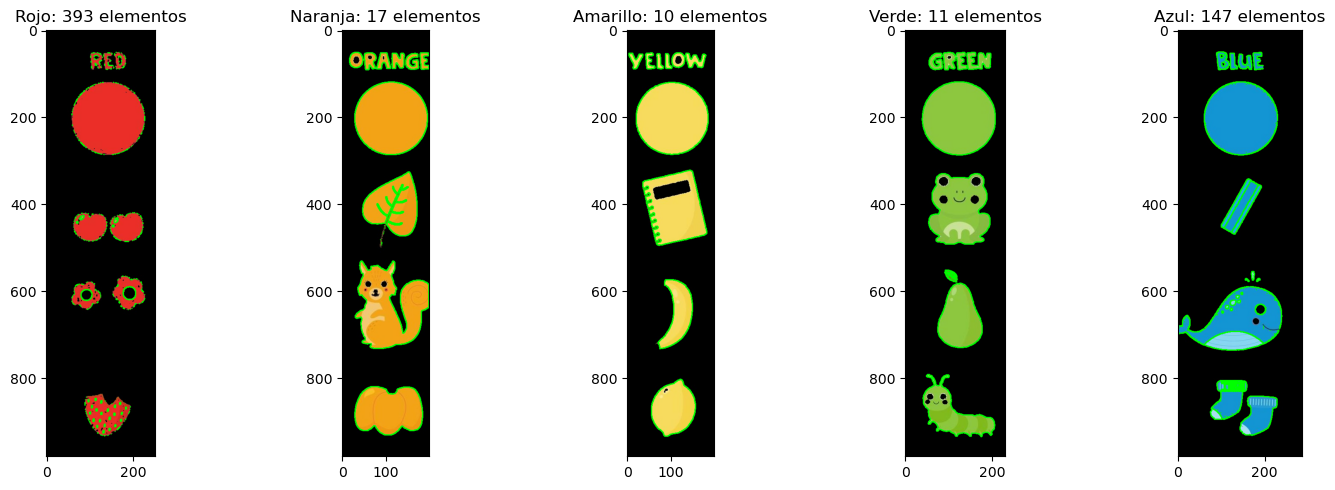

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../img/colores.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

amarilloBajo = np.array([20, 100, 20], np.uint8)
amarilloAlto = np.array([32, 255, 255], np.uint8)

azulBajo = np.array([80, 60, 50], np.uint8)
azulAlto = np.array([140, 255, 255], np.uint8)

verdeBajo = np.array([36, 50, 20], np.uint8)
verdeAlto = np.array([100, 255, 255], np.uint8)

rojoBajo = np.array([0, 100, 70], np.uint8)
rojoAlto = np.array([20, 255, 255], np.uint8)

naranjaBajo = np.array([5, 100, 100], np.uint8)
naranjaAlto = np.array([25, 255, 255], np.uint8)


mask1 = cv2.inRange(hsv, rojoBajo, rojoAlto)
mask2 = cv2.inRange(hsv, naranjaBajo, naranjaAlto)
mask3 = cv2.inRange(hsv, amarilloBajo, amarilloAlto)
mask4 = cv2.inRange(hsv, verdeBajo, verdeAlto)
mask5 = cv2.inRange(hsv, azulBajo, azulAlto)

result1 = cv2.bitwise_and(img, img, mask=mask1)
result2 = cv2.bitwise_and(img, img, mask=mask2)
result3 = cv2.bitwise_and(img, img, mask=mask3)
result4 = cv2.bitwise_and(img, img, mask=mask4)
result5 = cv2.bitwise_and(img, img, mask=mask5)

cv2.imwrite('../img/rojo.jpg', result1[0:1000, 0:250, :])
cv2.imwrite('../img/naranja.jpg', result2[0:1000, 300:500, :])
cv2.imwrite('../img/amarillo.jpg', result3[0:1000, 600:800, :])
cv2.imwrite('../img/verde.jpg', result4[0:1000, 850:1080, :])
cv2.imwrite('../img/azul.jpg', result5[0:1000, 1100:1400, :])

def contar_y_dibujar(img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binaria = cv2.threshold(img_gris, 127, 255, cv2.THRESH_BINARY)
    bordes, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cont = len(bordes)
    img_contornos = img.copy()
    cv2.drawContours(img_contornos, bordes, -1, (0, 255, 0), 2)
    return cont, img_contornos

result1 = cv2.imread('../img/rojo.jpg')
result2 = cv2.imread('../img/naranja.jpg')
result3 = cv2.imread('../img/amarillo.jpg')
result4 = cv2.imread('../img/verde.jpg')
result5 = cv2.imread('../img/azul.jpg')

count1, contoured1 = contar_y_dibujar(result1)
count2, contoured2 = contar_y_dibujar(result2)
count3, contoured3 = contar_y_dibujar(result3)
count4, contoured4 = contar_y_dibujar(result4)
count5, contoured5 = contar_y_dibujar(result5)

plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.title(f"Rojo: {count1} elementos")
plt.imshow(cv2.cvtColor(contoured1, cv2.COLOR_BGR2RGB))

plt.subplot(1, 5, 2)
plt.title(f"Naranja: {count2} elementos")
plt.imshow(cv2.cvtColor(contoured2, cv2.COLOR_BGR2RGB))

plt.subplot(1, 5, 3)
plt.title(f"Amarillo: {count3} elementos")
plt.imshow(cv2.cvtColor(contoured3, cv2.COLOR_BGR2RGB))

plt.subplot(1, 5, 4)
plt.title(f"Verde: {count4} elementos")
plt.imshow(cv2.cvtColor(contoured4, cv2.COLOR_BGR2RGB))

plt.subplot(1, 5, 5)
plt.title(f"Azul: {count5} elementos")
plt.imshow(cv2.cvtColor(contoured5, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


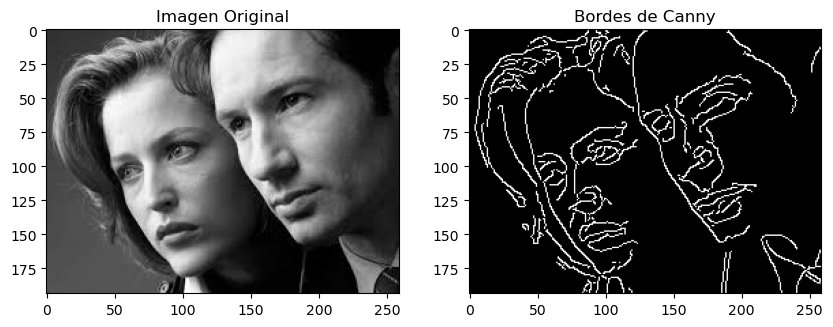

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('..//img/X.jpg', 0)

# Aplicamos un filtro Gaussiano a la imagen para suavizarla y reducir el ruido
image_blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Aplicamos el operador de Canny a la imagen suavizada para detectar los bordes
edges = cv2.Canny(image_blurred, 50, 150)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Bordes de Canny')
plt.show()
